# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [312]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential # Sequential/Functional Api
from tensorflow.keras.layers import Dense # type of layer
from tensorflow.keras import regularizers
from keras.regularizers import l1
from keras.regularizers import l2


In [313]:
df=pd.read_csv("compresive_strength_concrete.csv", index_col = False, header = 0, names = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Super Plasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete Strength' ])

In [314]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Super Plasticizer     0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Concrete Strength     0
dtype: int64

In [315]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Super Plasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Concrete Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [316]:
train_df = df.sample(frac=0.7, random_state=0) # will reserve 20% for validation during training
test_df = df.drop(train_df.index)

In [317]:
# separating the target value, or “label”, from the features.
train_labels = train_df.pop('Concrete Strength')
test_labels = test_df.pop('Concrete Strength')

In [318]:
##### Data Normalization ######
mean = train_df.mean(axis=0)
train_df -= mean
std = train_df.std(axis=0)
train_df /= std

test_df -= mean
test_df /= std

train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,721.0,-2.120203e-15,1.0,-1.716146,-0.829111,-0.146850,0.656936,2.475023
Blast Furnace Slag,721.0,-5.575753e-16,1.0,-0.837300,-0.837300,-0.604234,0.809311,3.350896
Fly Ash,721.0,3.416900e-16,1.0,-0.865080,-0.865080,-0.865080,0.987597,2.268654
Water,721.0,2.650754e-15,1.0,-2.842623,-0.811102,0.169307,0.508679,3.058686
Super Plasticizer,721.0,2.228145e-16,1.0,-1.015540,-1.015540,-0.015215,0.685012,4.352869
Coarse Aggregate,721.0,1.623436e-14,1.0,-2.255394,-0.552474,-0.084496,0.713667,2.216396
Fine Aggregate,721.0,1.756377e-15,1.0,-2.216423,-0.648892,0.094344,0.664242,2.754283
Age,721.0,5.682001e-17,1.0,-0.712798,-0.503688,-0.278493,0.171897,5.142275


Text(0.5, 1, 'Correlation Between Variables')

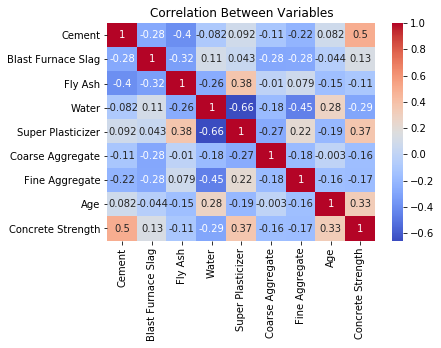

In [319]:
corr = df.corr()
sns.heatmap(corr,xticklabels=True,yticklabels=True,annot = True,cmap ='coolwarm')
plt.title("Correlation Between Variables")

In [335]:
def build_model():
    from tensorflow import keras
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu',
                           input_shape=(train_df.shape[1],)))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001), activation='relu'))
    model.add(layers.Dropout(0.1))  
    model.add(layers.Dense(128, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001), activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(128, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001), activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(1))
    model.compile(optimizer= 'rmsprop', loss='mse', metrics=['mae'])
    return model

In [336]:
model = build_model()
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_181 (Dense)            (None, 256)               2304      
_________________________________________________________________
dropout_117 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_182 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_118 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_183 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_119 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_184 (Dense)            (None, 128)             

In [337]:
example_batch = train_df[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.02423283],
       [-0.07675429],
       [-0.03675942],
       [-0.00755038],
       [-0.05094742],
       [-0.07286319],
       [-0.00096497],
       [-0.07585611],
       [ 0.03474276],
       [-0.12756082]], dtype=float32)

In [338]:
EPOCHS = 1000

history = model.fit(
  train_df, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:702.9412,  mean_absolute_error:21.0136,  val_loss:263.5988,  val_mean_absolute_error:13.0863,  
....................................................................................................
Epoch: 100, loss:37.5352,  mean_absolute_error:4.1732,  val_loss:31.7820,  val_mean_absolute_error:3.7593,  
....................................................................................................
Epoch: 200, loss:23.8827,  mean_absolute_error:3.3426,  val_loss:37.4929,  val_mean_absolute_error:4.2267,  
....................................................................................................
Epoch: 300, loss:18.7766,  mean_absolute_error:2.8765,  val_loss:25.1197,  val_mean_absolute_error:3.3507,  
....................................................................................................
Epoch: 400, loss:18.1859,  mean_absolute_error:2.9185,  val_loss:28.3595,  val_mean_absolute_error:3.4994,  
................................................

In [339]:
example_batch = test_df[5:6]
example_batch

example_result = model.predict(example_batch)
print(example_result)

[[37.673695]]


In [340]:
test_predictions = model.predict(test_df).flatten()

from sklearn.metrics import r2_score
print(r2_score(test_labels,test_predictions))

0.9011343429034845


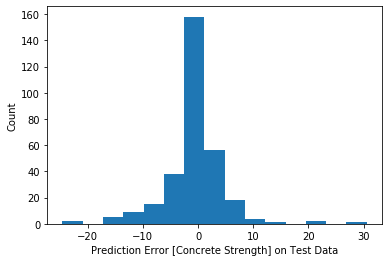

In [341]:
error = test_predictions - test_labels
plt.hist(error, bins = 15)
plt.xlabel("Prediction Error [Concrete Strength] on Test Data")
_ = plt.ylabel("Count")